# Lab 4 (House Prices - PCA and Regression Techniques)

In this lab, I predicted sales prices and practice feature engineering.


## Introduction:

In this lab, I worked with a dataset that describes various aspects of residential homes in Ames, Iowa. The objective iss to develop a regression model that accurately predicts the prices of each home based on a set of 79 explanatory variables. My goal is to consider a wide range of factors that impact house prices, and it's worth noting that this dataset is used as part of an ongoing Kaggle competition.

__Step 1 (Data Loading):__ I started by accessing the dataset on the [Kaggle competition page](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) and carefully reading the data description to familiarize myself with its contents.

__Step 2 (Data Engineering):__ This step involves various data preprocessing tasks, including data cleaning, one-hot encoding, handling missing values (NaNs), and addressing any negative infinity (-inf) values in the dataset.

__Step 3 (Dimension Reduction):__ Here, I explored dimension reduction techniques with Principal Component Analysis (PCA) being one of the potential choices, to reduce the number of features while preserving as much information as possible.

__Step 4 (Model Selection):__ I used Linear Regression to model and predict the sales value!



In [ ]:
##Step 1
#### how many data points? # 1460 points
#### how many variables (features)? 81 Variables
#### how many of these variables are categorical? 38 of them are Categoricals
#### How many NaNs each column has? 10 NaNs

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Samples = pd.read_csv('sample_submission.csv')
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

__Step 2:__

1. Identifying and Removing Irrelevant Features: Features with a substantial number of missing values may not significantly contribute to our future model. Therefore, we need to identify and remove such features before addressing the NaNs.

2. Handling Missing Data and Categorical Variables: To prepare the dataset for modeling, we must address missing information (NaNs) and convert categorical variables into a numerical format to create a numerical dataset (matrix).

3. Data Split: It's worth noting that the dataset is already divided into test and train sets. We can combine them so we dont have to apply preprocessing twice.


In [ ]:
## Step 2: Data Preprocessing



### Column Removal: From Step 1, we have information about how many NaNs each column contains.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### You will now remove columns with a substantial number of missing values.

#for Train

TrainCategoryDrop =Train.select_dtypes(include=['object'])
print(TrainCategoryDrop)
Train = Train.drop(TrainCategoryDrop, axis=1)

#for Test

TestCategoryDrop =Test.select_dtypes(include=['object'])
print(TestCategoryDrop)
Test = Test.drop(TestCategoryDrop, axis=1)

missing_percent_train = (Train.isna().sum()/ len(Train))
missing_percent_test = (Test.isna().sum()/ len(Test))
threshold = 0.5
TrainThresholdDrop = missing_percent_train[missing_percent_train > threshold].index
Train = Train.drop(TrainThresholdDrop, axis=1)

TestThresholdDrop = missing_percent_test[missing_percent_test > threshold].index
Test = Test.drop(TestThresholdDrop, axis=1)

### Handling Missing Values:
### For the remaining columns, we have several options to handle missing values:
### Replace NaNs with (1) zeros, (2)the column average, or (3) he row average if appropriate for your analysis.

#We replaced the NaNs with 0 because that's what  makes the most sense to us. [Note: Alter depending on regression results]
Train = Train.fillna(0)
Test = Test.fillna(0)

Sales = Train[["SalePrice"]]

### Discuss which one do you wanna choose.
### Check for any occurrences of -inf values in the dataset and replace them with zeros.
### How do you handel Categorical Variables? You can remove them or convert them to numeric values. Discuss this!
print(Train)
TrainN = Train.to_numpy()
TestN = Train.to_numpy()
SalesN = Sales.to_numpy()

Streaming output truncated to the last 5000 lines.
846              0         2         1             3             1   
847              0         1         0             3             1   
848              0         3         0             5             1   
849              0         2         1             3             1   
850              0         1         0             1             1   
851              0         2         0             2             1   
852              0         2         0             4             1   
853              0         1         1             3             1   
854              0         1         1             3             1   
855              0         1         1             3             1   
856              0         1         0             3             1   
857              0         2         1             3             1   
858              0         2         0             3             1   
859              0         2         1 

__Step 3 (Feature Reduction):__
In steps 1 and 2, I already reduced dimensionality by removing certain features. Now, applying Principal Component Analysis (PCA) will further reduce the number of features, enhancing my model's accuracy by condensing the countless variables we've worked with before into a few key trends.


In [ ]:
## Step 3 (PCA)
from sklearn.decomposition import PCA

# Create a PCA object with 3 components
pca = PCA(n_components=3)

# Fit the PCA model to the TrainN dataset and transform it
reduced_data_train = pca.fit_transform(TrainN) #for train dataset
reduced_data_test = pca.fit_transform(TestN) #for test dataset

# Create column names for the DataFrame
columnnames = [f'PC{i}' for i in range(1, 4)]

# Create a DataFrame with the reduced data (not reconstructed data)
TrainPCA = pd.DataFrame(reduced_data_train, columns=columnnames)
TestPCA = pd.DataFrame(reduced_data_test, columns=columnnames)

I applied a linear regression model in this step and assessed how accurately my model predicts the test values.

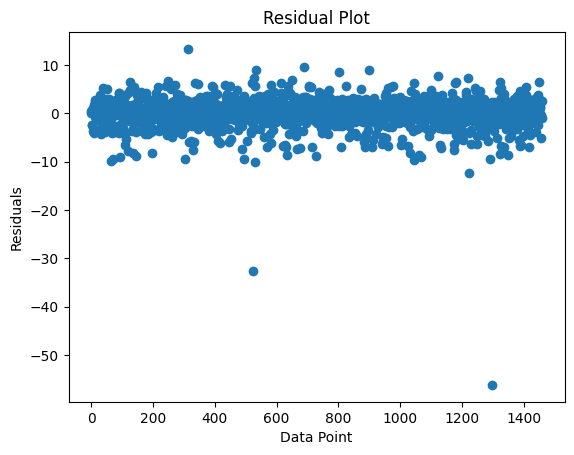

In [ ]:
## Step 4: Applying Linear Regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
reg = LinearRegression()

# Fit the model using reg.fit() on your training data
reg.fit(TrainPCA, SalesN)

# Predict the target variable on the data
y_pred = reg.predict(TrainPCA)

# Calculate residuals
residuals = SalesN - y_pred

# Plot residuals
plt.scatter(range(len(residuals)), residuals)
plt.xlabel("Data Point")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(SalesN, y_pred) #getting the numerical accuracy between SalesN and the prediction for SalesN (y_pred)
print("RMSE =",rmse)

RMSE = 10.409366304967676


We've found the accuracy between the sales price output and the predicted output based on the available inputs (all from the Train.csv)to be relatively very accurate (plus or minus 10 isn't much when the Sales price values in the Train.csv are in the 100,000s on average). This allows us to state that the trained predicted output based on the inputs can be useful for comparisons with data from the Test.csv. We now need to perform Regression and PCA for the Test dataset as well. That way, we can give a prediction on the potential sales prices for the Test.csv

In [ ]:
print(len(TestN))
print(TestPCA)
print(len(y_pred))


1460
                PC1            PC2          PC3
0      27493.693994   -2993.901891  -291.098741
1        547.887379    -929.979782   746.484340
2      42579.611127    -701.908338  -472.422697
3     -40929.500148     409.289186  -561.292207
4      69169.883226    1418.339447  -517.929450
5     -37779.857250    4874.210103   -58.250260
6     125995.723964   -4665.123979  1039.778994
7      19067.693184    -771.092741  -300.618770
8     -51138.058363   -2679.204539  -667.585445
9     -62991.098901    -973.710522   634.786612
10    -51370.484586    2416.888021   669.979840
11    164035.931700   -4112.470436  -371.508626
12    -36821.376375    3692.658998   521.436621
13     98527.778120   -3185.052359    57.083663
14    -23893.629231    1211.762029   559.212778
15    -49045.677492   -2753.747490    39.714309
16    -31881.212802    1799.500397   402.677998
17    -90864.335965    3332.932279  -166.421936
18    -21803.077328    3915.444470   477.685111
19    -41996.869253   -1541.235384 

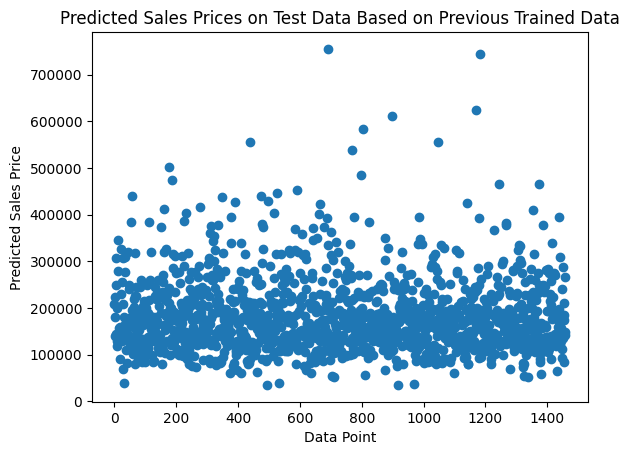

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
reg = LinearRegression()

# Fit the model using reg.fit() on your training data
reg.fit(TrainPCA, SalesN)

# Predict the target variable on the test data
test_predictions = reg.predict(TestPCA)

plt.scatter(range(len(test_predictions)), test_predictions)
plt.xlabel("Data Point")
plt.ylabel("Predicted Sales Price")
plt.title("Predicted Sales Prices on Test Data Based on Previous Trained Data")
plt.show()

In [ ]:
mean_prediction = np.mean(test_predictions)
median_prediction = np.median(test_predictions)
std_deviation = np.std(test_predictions)

print("Mean Prediction:", mean_prediction)
print("Median Prediction:", median_prediction)
print("Standard Deviation of Predictions:", std_deviation)

Mean Prediction: 180921.19589041095
Median Prediction: 163001.29747483047
Standard Deviation of Predictions: 79415.29182052995
